LABORATORIO - 4 - PRESENCIAL  - Hineill David Céspedes Espinoza - 20213704

PREGUNTA 1 : 
Se tiene una señal obtenida de un EMG (Electromiograma) con 1 activación muscular en el archivo
(EMG_raw.npy). Esta ha sido muestreada a 1 kHz y se encuentra contaminada con ruido de alta frecuencia

a)  ASINCRONA ,  Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la
transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal,
destacando el ruido a 60 Hz mediante líneas verticales (1 punto)

In [99]:
#-----------IMPORTAMOS LAS LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3207552092.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


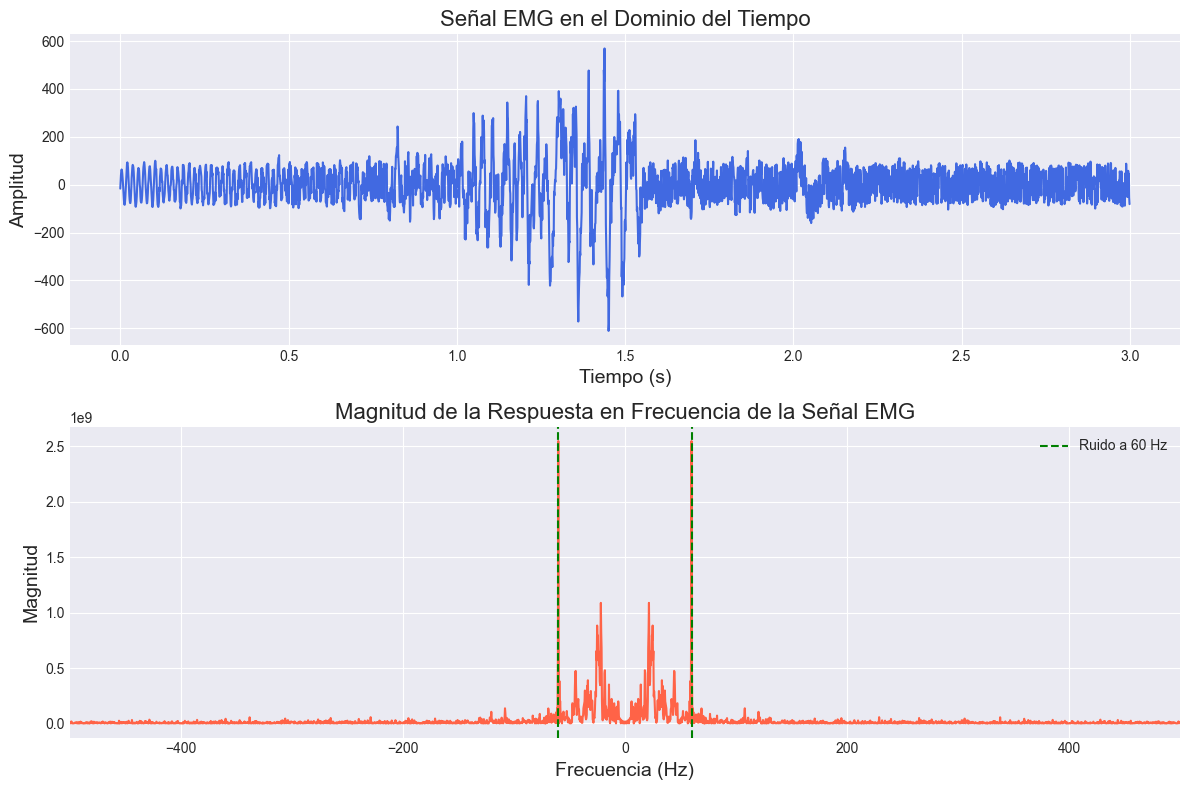

In [113]:
emg_signal = np.load("EMG_raw.npy")  
fs = 1000  
n_samples = len(emg_signal)
t = np.arange(n_samples) / fs
fft_emg_signal = np.fft.fftshift(np.fft.fft(emg_signal))
freq = (np.arange(n_samples) - n_samples/2) * fs / n_samples
magnitud_fft_emg_signal = np.abs(fft_emg_signal)**2
plt.style.use('seaborn-darkgrid')  
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
ax1.plot(t, emg_signal, color='royalblue')
ax1.set_title('Señal EMG en el Dominio del Tiempo', fontsize=16)
ax1.set_xlabel('Tiempo (s)', fontsize=14)
ax1.set_ylabel('Amplitud', fontsize=14)
ax1.grid(True)
ax2.plot(freq, magnitud_fft_emg_signal, color='tomato')
ax2.axvline(60, color='green', linestyle='--', label='Ruido a 60 Hz')
ax2.axvline(-60, color='green', linestyle='--')
ax2.set_title('Magnitud de la Respuesta en Frecuencia de la Señal EMG', fontsize=16)
ax2.set_xlabel('Frecuencia (Hz)', fontsize=14)
ax2.set_ylabel('Magnitud', fontsize=14)
ax2.set_xlim(-fs/2, fs / 2)  
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

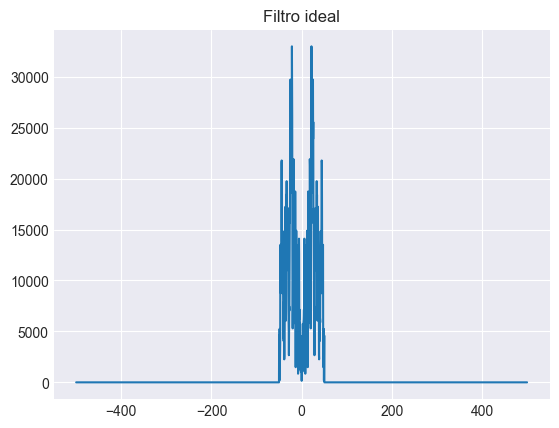

In [140]:
filtro_ideal = []
freq_ideal=[]
for i in range(len(freq)):
    if(freq[i]>=-50 and freq[i]<=50):
        filtro_ideal.append(fft_emg_signal[i])
    else:
        filtro_ideal.append(0)
plt.title("Filtro ideal")
plt.plot(freq, np.abs(filtro_ideal))

C:\Users\Hineill\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


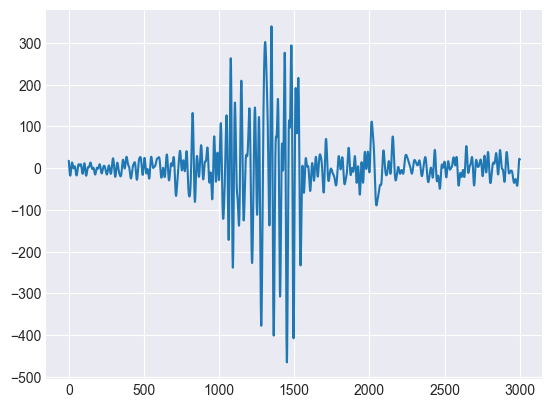

In [141]:
signal_filtrada = np.fft.ifft(np.fft.ifftshift(filtro_ideal))
plt.plot(signal_filtrada)

In [134]:
print(len(signal_filtrada))

3000


b) [Tarea asíncrona] Diseñar un filtro FIR utilizando el método de ventanas con una ventana de
Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su
magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la
respuesta ideal (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\160784296.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")


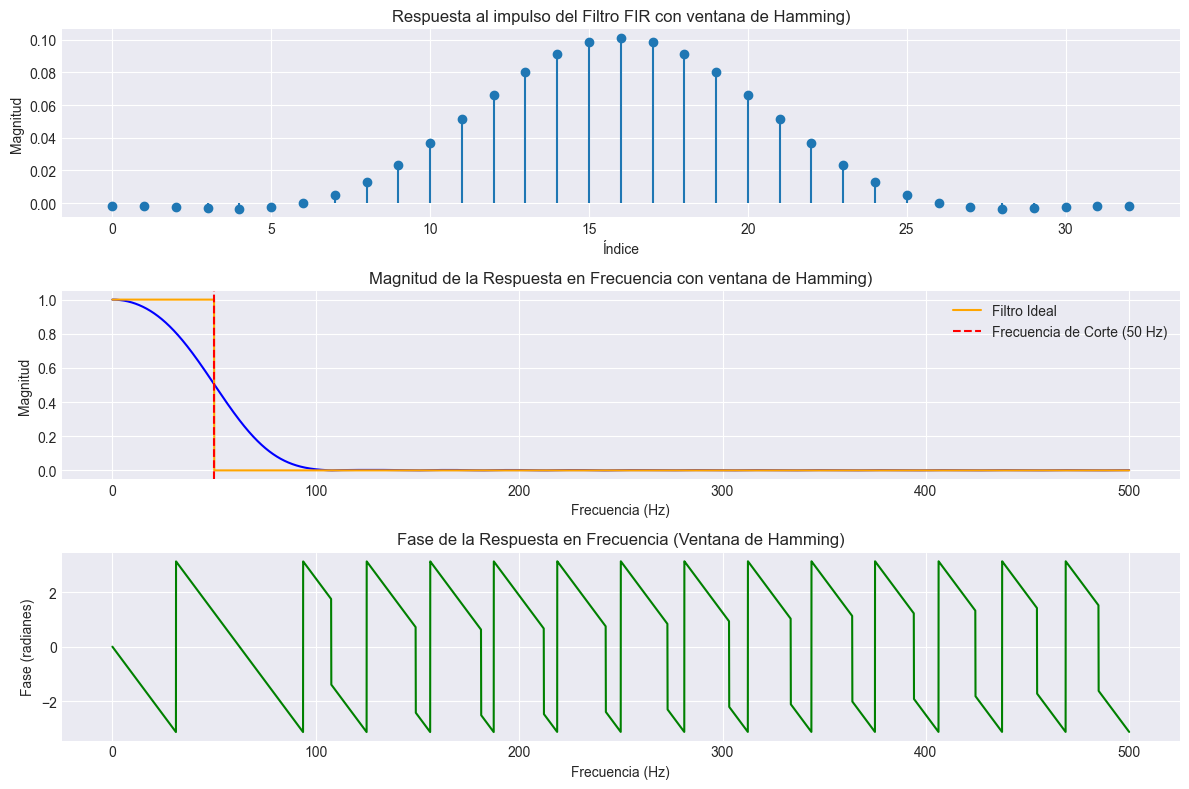

In [101]:
from scipy.signal import firwin, freqz
fs = 1000  #Hz
fc = 50   #Hz
# Diseño del filtro FIR con ventana de Hamming
#ASUMIMOS QUE LA FRECUENCIA DE MUESTREO DE LA SINC ES EL MISMO Q EL DE LA SEÑAL DEL ELECTROCARDIOGRAMA
coeficiente_filtro_enventanado = firwin(33, fc, fs=fs, window="hamming")
#CALCULAMOS LA RESPUESTA EN FRECUENCIA DEL FILTRO 
w, h = freqz(coeficiente_filtro_enventanado, worN=10000, fs=fs)
# Graficar la respuesta impulsiva del filtro
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.stem(coeficiente_filtro_enventanado, use_line_collection=True, basefmt=" ")
plt.title("Respuesta al impulso del Filtro FIR con ventana de Hamming)")
plt.xlabel("Índice")
plt.ylabel("Magnitud")
# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(w, abs(h), color='blue')
plt.plot(w, np.where(w <= fc, 1, 0), color='orange', label="Filtro Ideal")  # +1e-10 para evitar log(0)
plt.title("Magnitud de la Respuesta en Frecuencia con ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.axvline(50, color='red', linestyle='--', label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la Respuesta en Frecuencia (Ventana de Hamming)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.tight_layout()
plt.show()
respuesta_impulsiva_filtro_ventana_hamming=coeficiente_filtro_enventanado

c) Diseñar un filtro FIR utilizando el método de mínimos cuadrados con 45 muestras en
frecuencia, 33 coeficientes y frecuencia de corte de 50 Hz. Graficar la magnitud y fase de la
respuesta en frecuencia, comparándola con la respuesta ideal (1 punto).

In [143]:
def plotear_respuesta_impulso_espectro_magnitud_fase(h_n ,espectro,frecuencias ,  title ,fc): #fc normalizado
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.stem(h_n, use_line_collection=True, basefmt=" ")
    plt.title(f"Respuesta al impulso de {title} " )
    plt.xlabel("Índice")
    plt.ylabel("Magnitud")
    # Graficar la magnitud de la respuesta en frecuencia
    plt.subplot(3, 1, 2)
    plt.plot(frecuencias, np.abs(espectro), color='blue')
    plt.plot(frecuencias, np.where(frecuencias <= fc, 1, 0), color='orange', label="Filtro Ideal")  
    plt.title(f"Espectro de magnitud de respuesta en frecuencia de {title}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.grid(True)
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(frecuencias, np.angle(espectro), color='green')
    plt.title(f"Espectro de fase de respuesta en frecuencia de {title}")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Fase (radianes)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3390547587.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, use_line_collection=True, basefmt=" ")


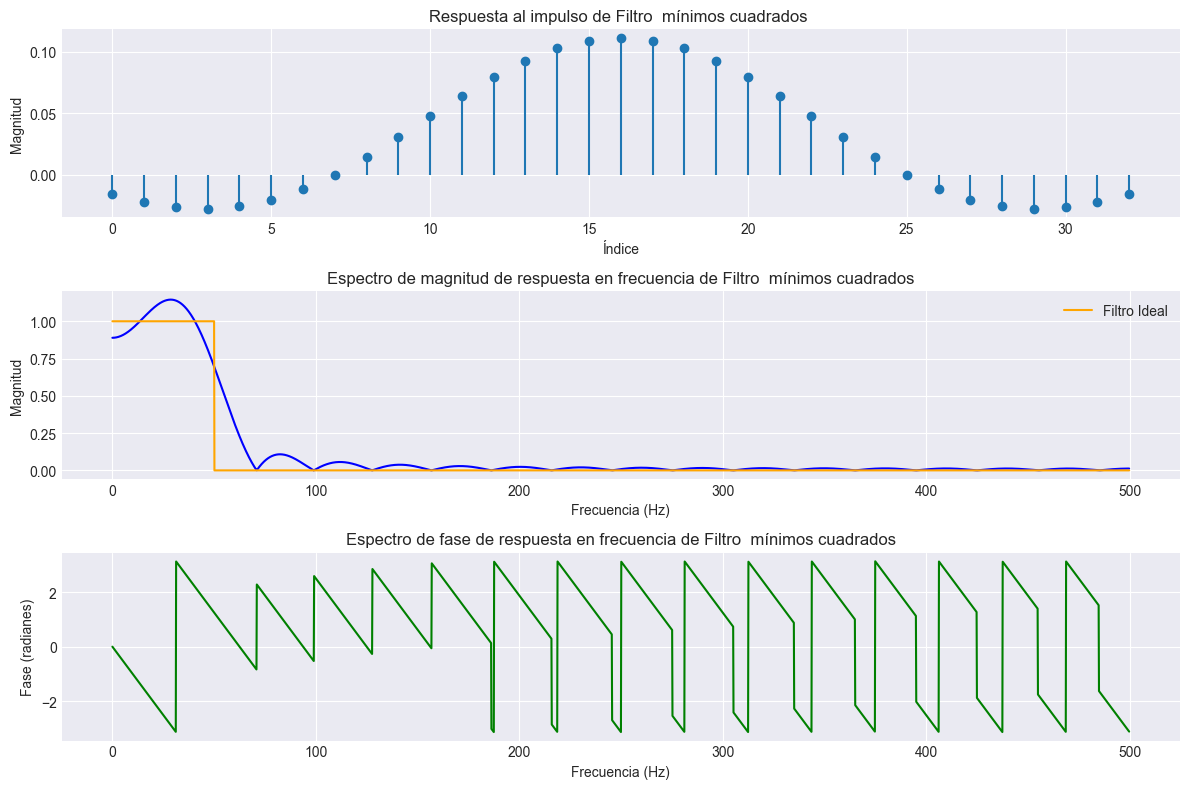

In [145]:
#USAMOS COMO BASE EL CÓDIGO PROPORCIONADO POR EL PROFESOR EN CLASE
# Filtro pasabajos ideal truncado
fc = 50
wc = 2*np.pi * (fc/fs)
def HPB(w,wc,nd):
    mask = np.abs(w)<=wc
    H = np.exp(-1j*w*nd)
    H[~mask] = 0
    return H
Nw = 45 # Número de muestras en frecuencia
M = 33 # Longitud del filtro
w = 2*np.pi*(np.arange(Nw)-np.fix(Nw/2)) / Nw
Hw = HPB(w,wc,(M-1)/2)
wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc,(M-1)/2)
A = np.zeros((Nw,M),dtype=complex)
n = np.arange(M)
for k in range(Nw):
    A[k,:] = np.exp(-1j*w[k]*n)
hn = np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),Hw))
w, h = freqz(hn, worN=3000, fs=fs)# Respuesta en frecuencia
plotear_respuesta_impulso_espectro_magnitud_fase(hn ,h ,w , "Filtro  mínimos cuadrados" , 50 )
respuesta_impulsiva_minimos_cuadrados = hn

Comentario: Después de obtener el gráfico del espectro de fase y de magnitud del filtro de mínimos cuadrados, se puede apreciar como se obtiene un filtro con cierta presencia de rizado en la banda de paso y de rechazo . Además se nota la tendencia a la caída de la magnitud del filtro una vez se pasa la frecuencia de corte  asemejandose a lo q sucedería con un filtro ideal (sin llegar a tener un cambio tan rápido como el ideal). En particular podemos notar por el espectro de fase , que este filtro posee una fase lineal en la banda de paso pero su fase no es lineal en la banda de rechazo . La no linealidad de la fase del espectro en la banda de rechazo no afecta el analisis posterior ya que de cualquier forma en esa zona del espectro se atenuará considerablemente la magnitud por lo que el desfase no afectara a otras componentes. 

d) Diseñar un filtro FIR utilizando el método de muestreo en frecuencia, con frecuencia de corte
de 50 Hz, y 33 coeficientes. Graficar la magnitud y fase de la respuesta en frecuencia, y
compararlas con la respuesta ideal (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3390547587.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, use_line_collection=True, basefmt=" ")


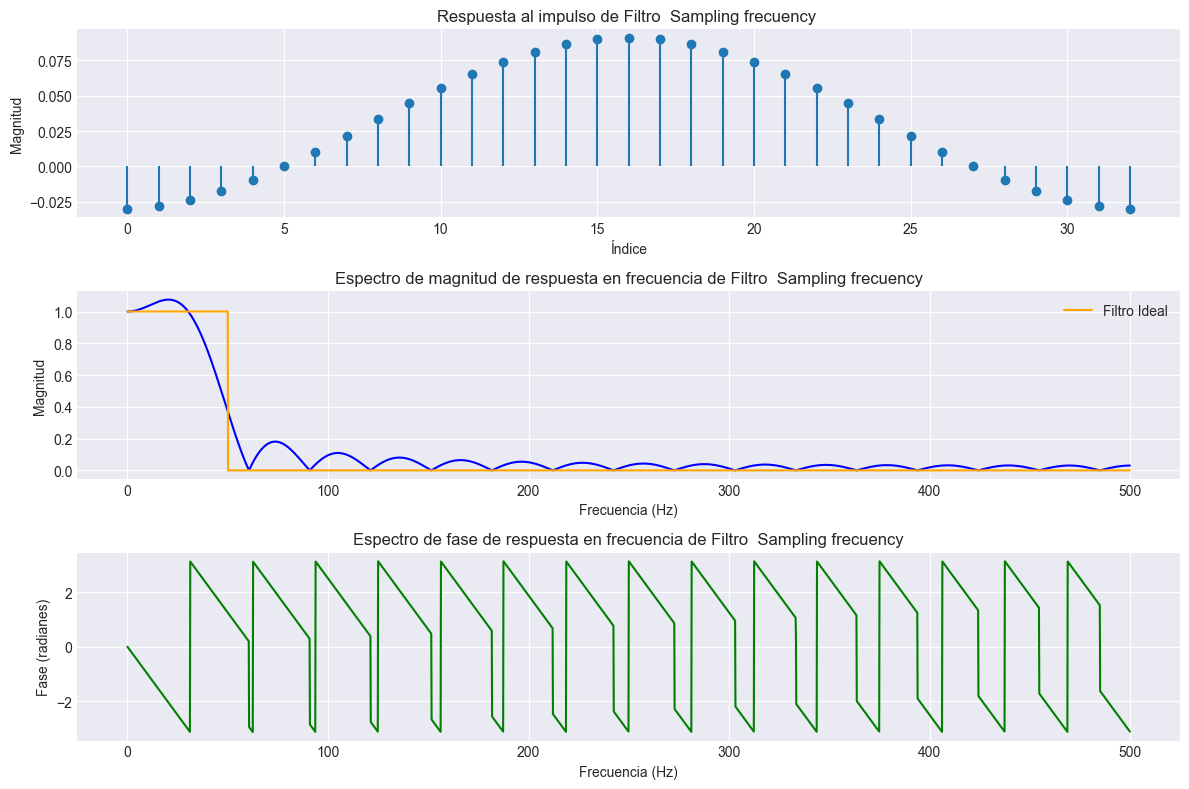

In [146]:
wc=2*np.pi*(fc/fs)
L=33
w=2*np.pi*(np.arange(L)-((L-1)/2)) / L #Calcular la respuesta impulsiva
def HPB(w,wc):
    H = 1*(np.abs(w)<wc)
    return H
Hw = HPB(w,wc)
wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc)
alpha = w[int(np.fix(L/2))]
Hw_shift = np.fft.ifftshift(Hw)
hn = np.fft.ifft(Hw_shift)
hn = np.fft.fftshift(hn) * np.exp(1j*alpha*(np.arange(L)-L/2))
w, h = freqz(hn, worN=3000, fs=fs)# Respuesta en frecuencia
plotear_respuesta_impulso_espectro_magnitud_fase(hn ,h ,w , "Filtro  Sampling frecuency" , 50 )
respuesta_impulsiva_frecuencia_muestreada = hn

De forma similar al anterior filtro, podemos apreciar la tendencia a decaer en magnitud una vez se pasa por la frecuencia de corte el decaimiento y la fase es lineal durante la banda de paso. De tal forma se intenta asemejar a la respuesta en frecuencia de un filtro ideal.   

e) Aplicar los filtros diseñados (Hamming, mínimos cuadrados y muestreo en frecuencia) a la señal
EMG. Graficar las señales filtradas en el dominio del tiempo y las magnitudes de sus respectivas
respuestas en el dominio de la frecuencia comparándolas la magnitud de la respuesta en
frecuencia de la señal original. Mencionar qué filtro logró el mejor desempeño y por qué (1
punto).

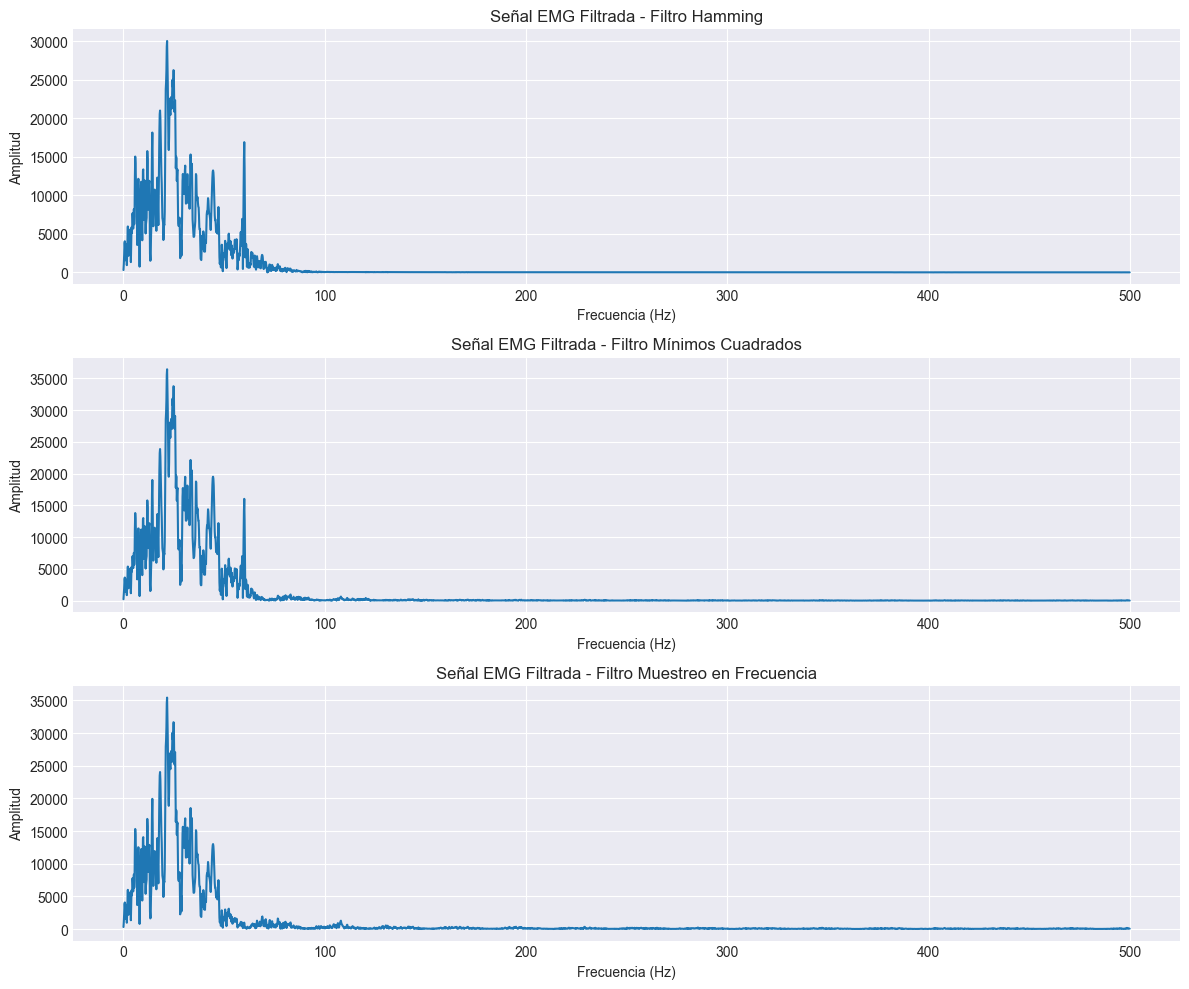

In [147]:
from scipy.signal import lfilter
emg_hamming = lfilter(coeficiente_filtro_enventanado, 1, emg_signal)
emg_mincuad = lfilter(respuesta_impulsiva_minimos_cuadrados, 1, emg_signal)
emg_muestreo = lfilter(respuesta_impulsiva_frecuencia_muestreada, 1, emg_signal)
w, esp_hamming = freqz(emg_hamming, worN=3000, fs=fs)
w, esp_mincuad = freqz(emg_mincuad, worN=3000, fs=fs)
w, esp_muestreo = freqz(emg_muestreo, worN=3000, fs=fs)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(esp_hamming), label="Filtro Hamming")
plt.title("Señal EMG Filtrada - Filtro Hamming")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(esp_mincuad), label="Filtro Mínimos Cuadrados")
plt.title("Señal EMG Filtrada - Filtro Mínimos Cuadrados")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.subplot(3, 1, 3)
plt.plot(w, np.abs(esp_muestreo), label="Filtro Muestreo en Frecuencia")
plt.title("Señal EMG Filtrada - Filtro Muestreo en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

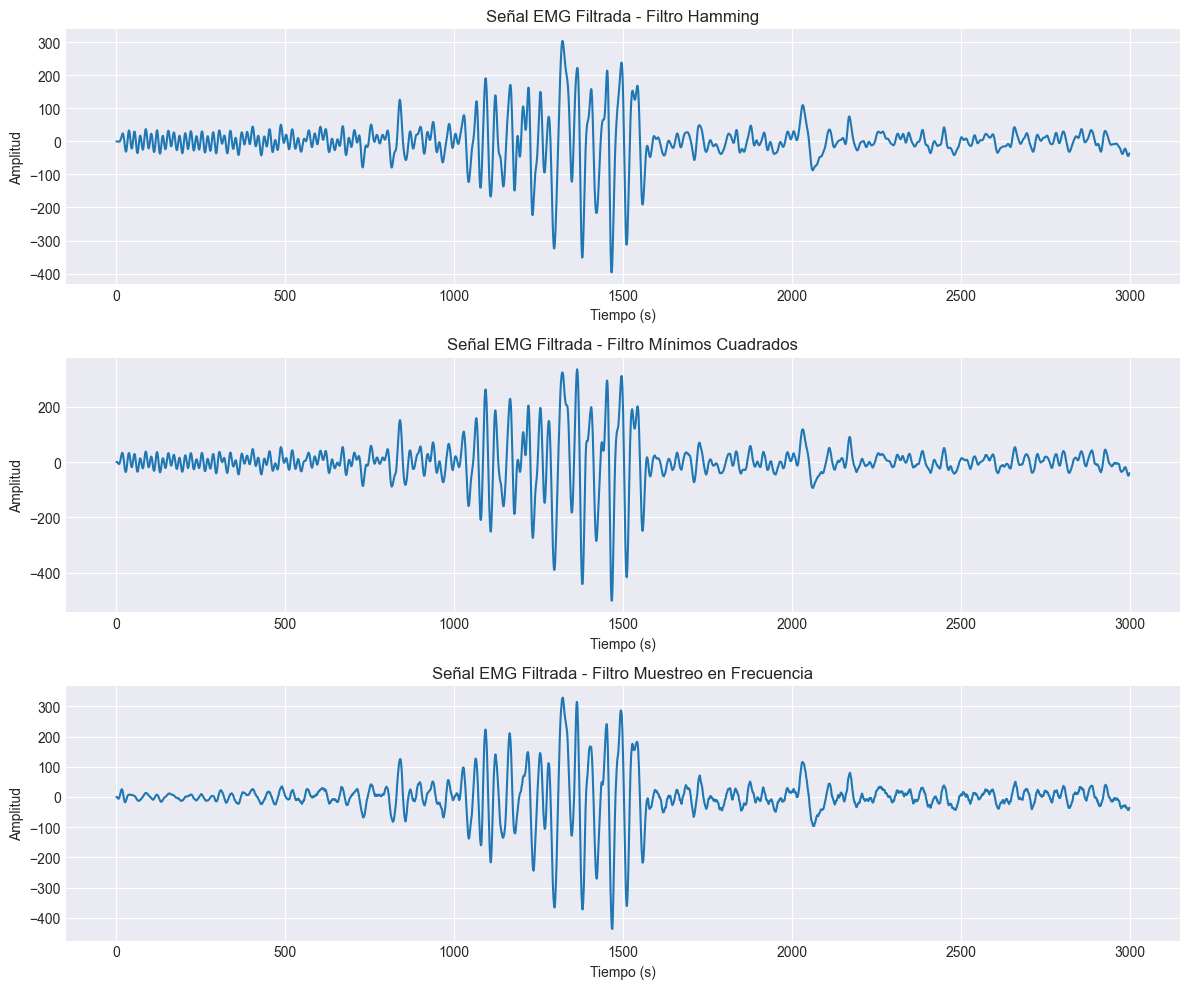

In [148]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(emg_hamming, label="Filtro Hamming")
plt.title("Señal EMG Filtrada - Filtro Hamming")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.subplot(3, 1, 2)
plt.plot(emg_mincuad, label="Filtro Mínimos Cuadrados")
plt.title("Señal EMG Filtrada - Filtro Mínimos Cuadrados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.subplot(3, 1, 3)
plt.plot(emg_muestreo, label="Filtro Muestreo en Frecuencia")
plt.title("Señal EMG Filtrada - Filtro Muestreo en Frecuencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

Muestreo en frecuencia es mejor porque atenúa más el nivel del ruido a 60 Hz en comparación a los otros 

In [ ]:
#JUSTIFICACIÓN CON CÓDIGO  
print(np.mean(np.abs(esp_hamming-filtro_ideal)))
print(np.mean(np.abs(esp_mincuad-filtro_ideal)))
print(np.mean(np.abs(esp_muestreo-filtro_ideal)))

2200.424493172724
2437.787772372749
2297.1427662230035


Por una cuestión de gráfica para lograr atenuar el ruido consideraría que el mejor filtro para la señal es el de muestreo en frecuencia para el caso en particular de la presencia de ruido a 60Hz , pero para considerando el desempeño completo del filtro a lo largo de todo el espectro (banda de paso , transición y rechazo) sería el filtro de Hamming el que tiene mayor semejanza al efecto de un filtro ideal.

PREGUNTA 2
Se busca comparar el rendimiento de dos filtros IIR clásicos (Chebyshev y Butterworth) en la eliminación
de ruido en la señal EMG.

a) Diseñar un filtro Chebyshev tipo I de orden 2 utilizando el método de invariancia al impulso, con
frecuencia de corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del
filtro (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3390547587.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, use_line_collection=True, basefmt=" ")


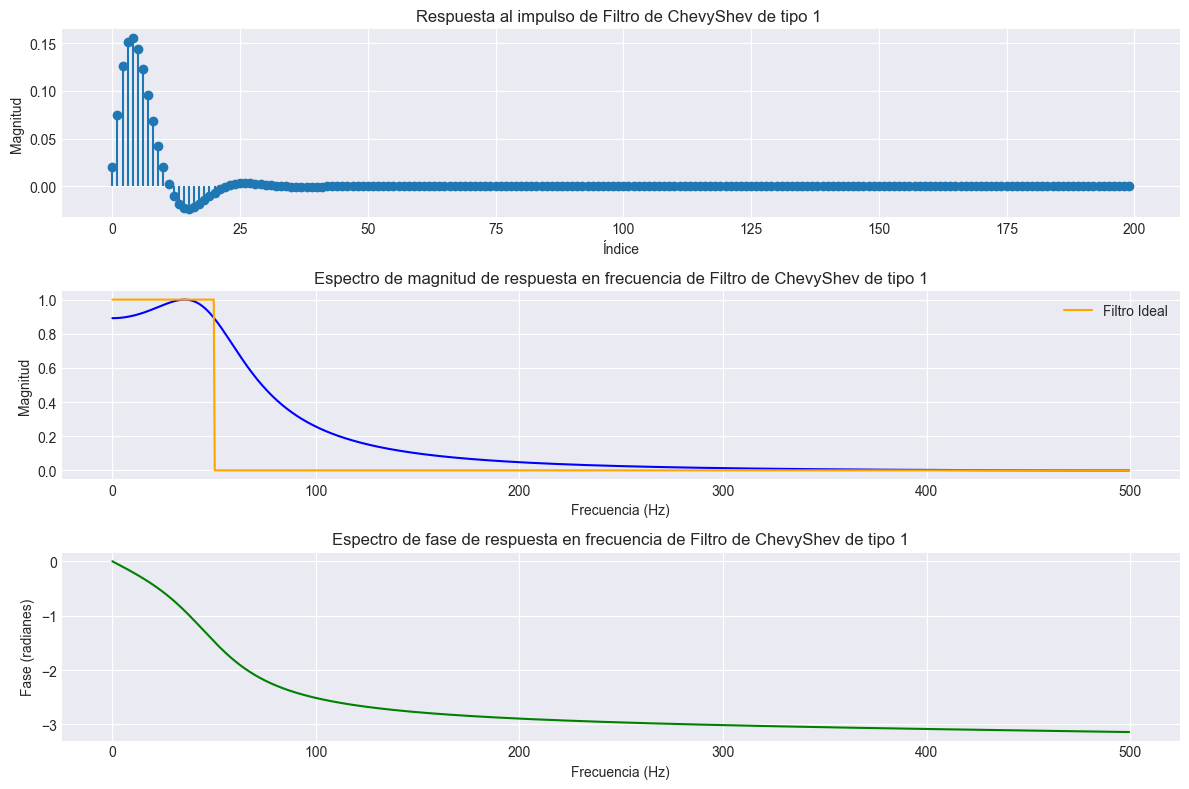

In [74]:
import scipy as sci
# Diseñando un Filtro Chebyshev
# Parámetros del filtro
fs = 1000  # Frecuencia de muestreo en Hz
fc = 50    # Frecuencia de corte en Hz
coe_x , coe_y = sci.signal.cheby1(2, 1, fc/(fs/2), btype='low', analog=False, output='ba')
dirac= np.zeros(200)
dirac[0] = 1
h_n = lfilter(coe_x ,coe_y, dirac)
w, h =sci.signal.freqz(h_n, 1, worN=1024, fs=fs)
plotear_respuesta_impulso_espectro_magnitud_fase( h_n,h ,w , "Filtro de ChevyShev de tipo 1" , 50 )
respuesta_al_impulso_chevyshev = h_n
frecuencias_chevyshev= w
espectro_chevyshev= h
#-------------------
coe_x_chevy = coe_x
coe_y_chevy = coe_y

Trata de asemejarse a un filtro ideal usando una frecuencia de corte de 50Hz 

b) Diseñar un filtro Butterworth de orden 2 utilizando la transformación bilineal y frecuencia de
corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del filtro (1 punto).

C:\Users\Hineill\AppData\Local\Temp\ipykernel_56960\3390547587.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h_n, use_line_collection=True, basefmt=" ")


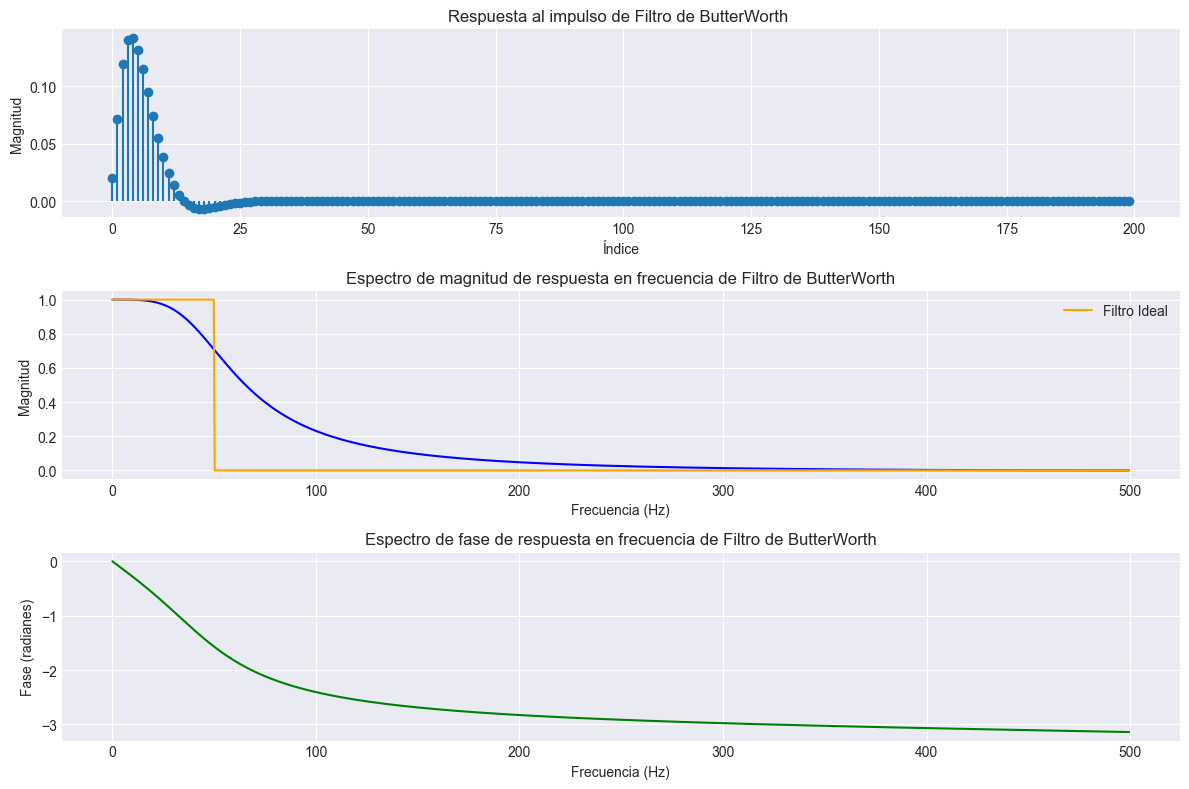

In [75]:
import scipy as sci
# Diseñando un Filtro Chebyshev
# Parámetros del filtro
fs = 1000  # Frecuencia de muestreo en Hz
fc = 50    # Frecuencia de corte en Hz
coe_x , coe_y = sci.signal.butter(2, fc/(fs/2), btype='low', analog=False, output='ba')
dirac= np.zeros(200)
dirac[0] = 1
h_n = lfilter(coe_x ,coe_y, dirac)
w, h =sci.signal.freqz(h_n, 1, worN=1024, fs=fs)
plotear_respuesta_impulso_espectro_magnitud_fase( h_n,h ,w , "Filtro de ButterWorth" , 50 )
respuesta_al_impulso_butterworth = h_n
frecuencias_butterworth= w
espectro_butterworth= h
#-------------------
coe_x_butter = coe_x
coe_y_butter = coe_y

c) Aplicar ambos filtros (Chebyshev y Butterworth) a la señal EMG y graficar las señales filtradas
en el dominio del tiempo y las magnitudes de sus respectivas respuestas en el dominio de la frecuencia comparándolas con la magnitud de la respuesta en frecuencia de la señal original (1
punto).

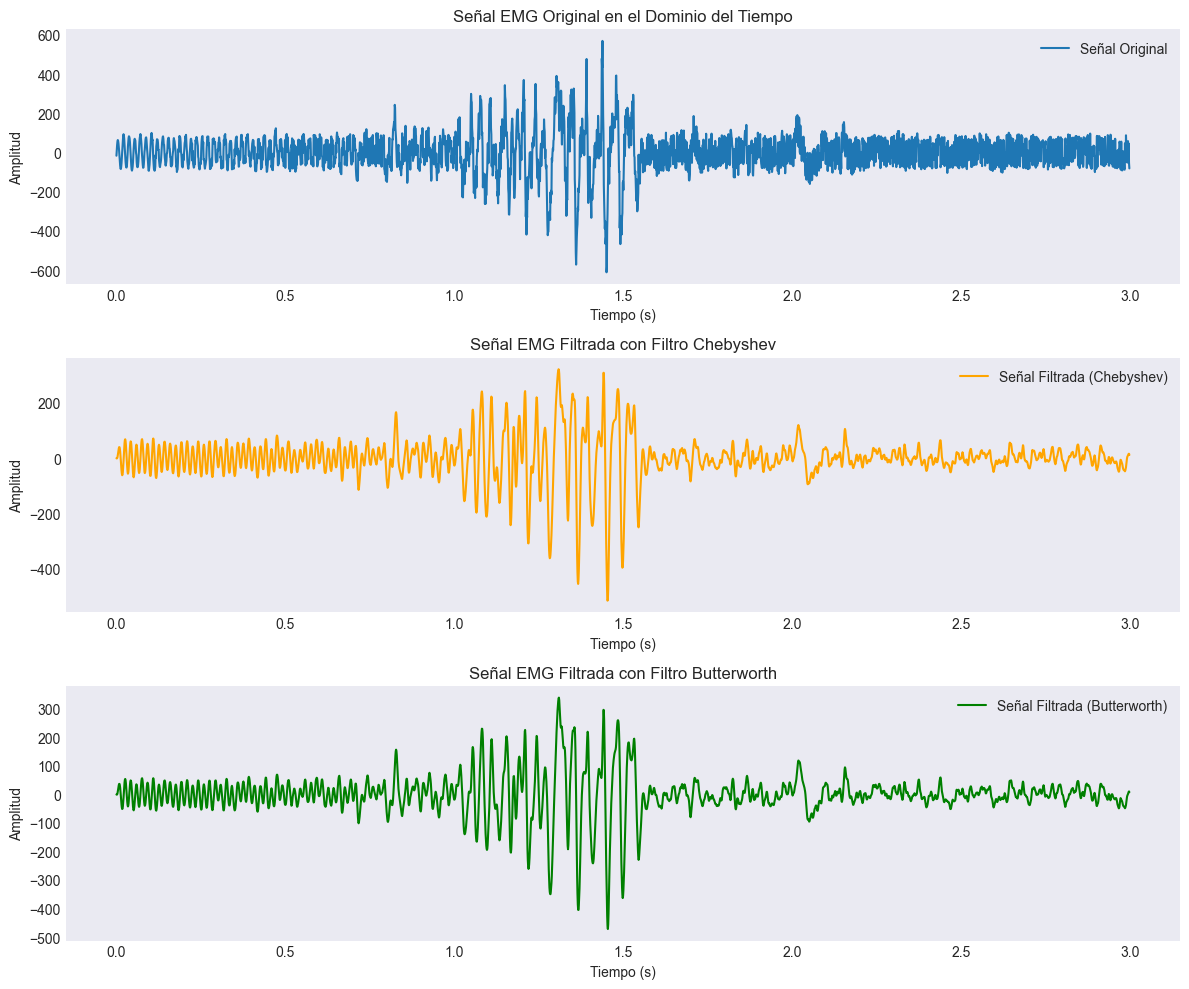

In [ ]:
emg_signal = np.load("EMG_raw.npy")
emg_filtered_cheby = lfilter(coe_x_chevy,coe_y_chevy, emg_signal)
# Aplicar el filtro Butterworth
emg_filtered_butter = lfilter(coe_x_butter,coe_y_butter, emg_signal)
frecuencies_chevy_filtrado ,  espectro_chevy_filtrado = freqz(emg_filtered_cheby,1 , worN=1024, fs=fs)
frecuencies_butter_filtrado ,  espectro_butter_filtrado = freqz(emg_filtered_butter,1 , worN=1024, fs=fs)
# Graficar las señales en el dominio del tiempo
t = np.arange(len(emg_signal)) / fs
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(t, emg_signal, label="Señal Original")
plt.title("Señal EMG Original en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(t, emg_filtered_cheby, color='orange', label="Señal Filtrada (Chebyshev)")
plt.title("Señal EMG Filtrada con Filtro Chebyshev")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, emg_filtered_butter, color='green', label="Señal Filtrada (Butterworth)")
plt.title("Señal EMG Filtrada con Filtro Butterworth")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




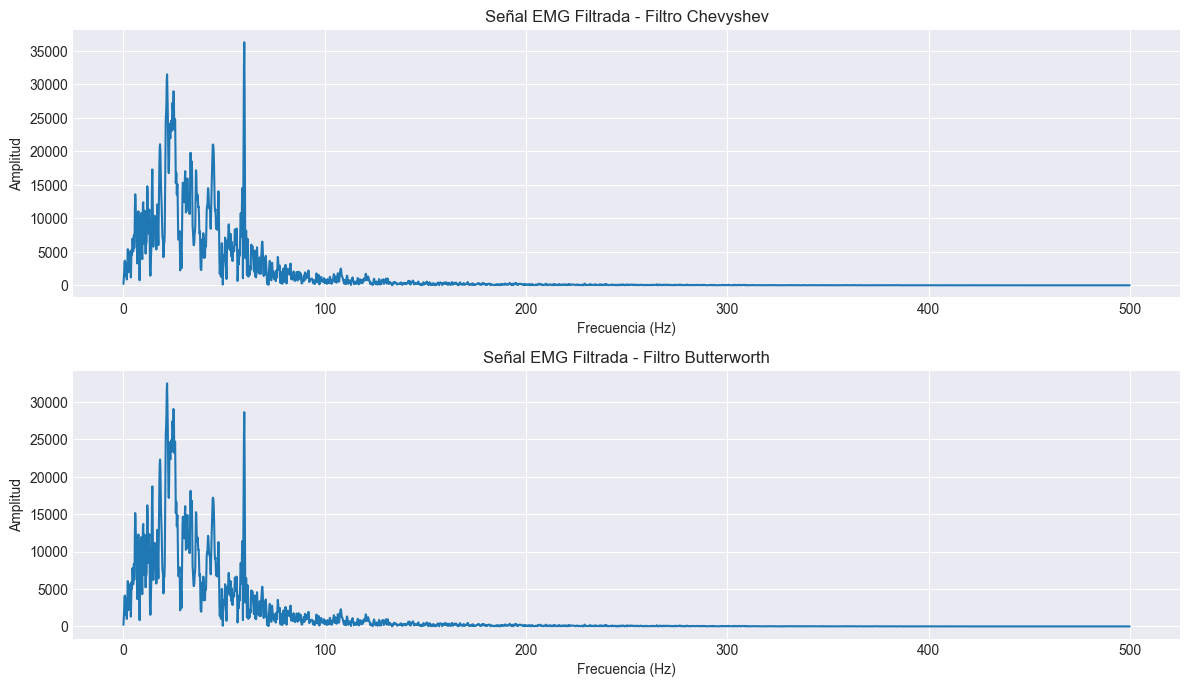

In [152]:
frecuencies_chevy_filtrado ,  espectro_chevy_filtrado = freqz(emg_filtered_cheby,1 , worN=3000, fs=fs)
frecuencies_butter_filtrado ,  espectro_butter_filtrado = freqz(emg_filtered_butter,1 , worN=3000, fs=fs)
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(frecuencies_chevy_filtrado, np.abs(espectro_chevy_filtrado), label="Filtro Hamming")
plt.title("Señal EMG Filtrada - Filtro Chevyshev")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.subplot(3, 1, 2)
plt.plot(frecuencies_butter_filtrado, np.abs(espectro_butter_filtrado), label="Filtro Mínimos Cuadrados")
plt.title("Señal EMG Filtrada - Filtro Butterworth")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()


ButterWorth es mejor a simple vista porque atenúa más el espectro en la componente de frecuencia donde está el ruido a 60 HZ . pero considerando similitud con la respuesta idel de un filtro , el filtro de butterworth es más cercano y eficiente (a lo lago de todo el espectro). 

In [153]:
#JUSTIFICACIÓN CON CÓDIGO  
print(np.mean(np.abs(espectro_chevy_filtrado-filtro_ideal)))
print(np.mean(np.abs(espectro_butter_filtrado-filtro_ideal)))

2597.3441788801742
2507.2735885821517


PREGUNTA 3 
Se busca analizar las diferencias del retardo de grupo entre filtros FIR e IIR.

a) Graficar las señales filtradas utilizando el filtro FIR de Hamming y el filtro Butterworth entre 1 y
2.5 segundos de la señal EMG, comparándolas en el dominio del tiempo. Mencionar las
diferencias observadas (0.5 puntos)

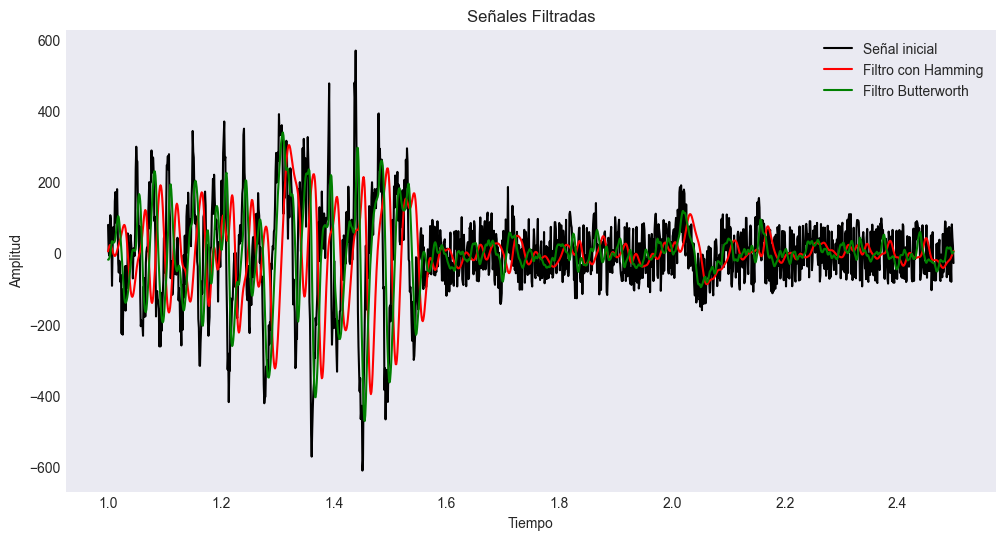

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, butter, lfilter
# Graficar señales filtradas en el intervalo de tiempo 1-2.5 segundos

start = int(fs)
end = int(2.5 * fs)
plt.figure(figsize=(12, 6))
plt.plot(t[start:end], emg_signal[start:end], label="Señal inicial", color="black")
plt.plot(t[start:end], emg_hamming[start:end], label="Filtro con Hamming", color="red")
plt.plot(t[start:end], emg_filtered_butter[start:end], label="Filtro Butterworth", color="green")
plt.title("Señales Filtradas")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()


En general las señales filtradas tienen mucha menor magnitud que la señal original. Además a pesar de ser atenuado se nota que se suavizaron los cambios (picos) de la gráfica y se mantuvo la tendencia que no implica las componentes de frecuencia alta (cambios rapidos) . No obstante , podemos ver que la gráfica azul está retrasada respecto a la señal original , esto era algo esperable dadas las gráficas obtenidas del espectro de fase.

b) Calcular y graficar el retardo de grupo del filtro FIR de Hamming (Sugerencia: Investigue el
comando group_delay de scipy.signal) y del filtro IIR Butterworth (1.5 puntos).


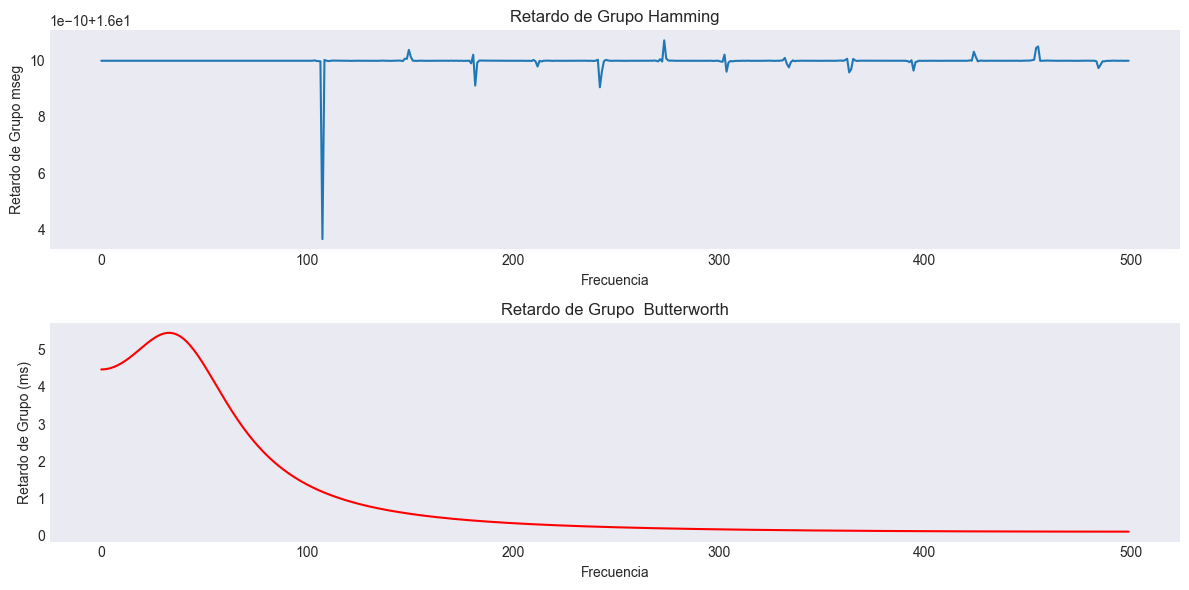

In [155]:
ola = sci.signal.firwin(33, 50/(1000/2), window='hamming')
frecuencias_delay_hamming, retardo_ventana = sci.signal.group_delay(( ola,1), fs=fs)
frecuencias_butter, retardo_butter = sci.signal.group_delay(( coe_x_butter, coe_y_butter), fs=fs)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frecuencias_delay_hamming, retardo_ventana, label="Retardo de Grupo FIR Hamming")
plt.title("Retardo de Grupo Hamming")
plt.xlabel("Frecuencia")
plt.ylabel("Retardo de Grupo mseg")
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(frecuencias_butter, retardo_butter, label="Retardo de Grupo Butterworth", color="red")
plt.title("Retardo de Grupo  Butterworth")
plt.xlabel("Frecuencia")
plt.ylabel("Retardo de Grupo (ms)")
plt.grid()
plt.tight_layout()
plt.show()

In [95]:
print(np.mean(retardo_ventana))
prom_retardo_ventana = np.mean(retardo_ventana)

15.999999999998497


c) Corregir la señal filtrada con el filtro FIR de Hamming aplicando el retardo de grupo calculado
previamente. Graficar la señal filtrada original y la señal filtrada corregida en el dominio del
tiempo, comparándolas entre 1 y 2.5 segundos respecto a la señal original (1.5 puntos).

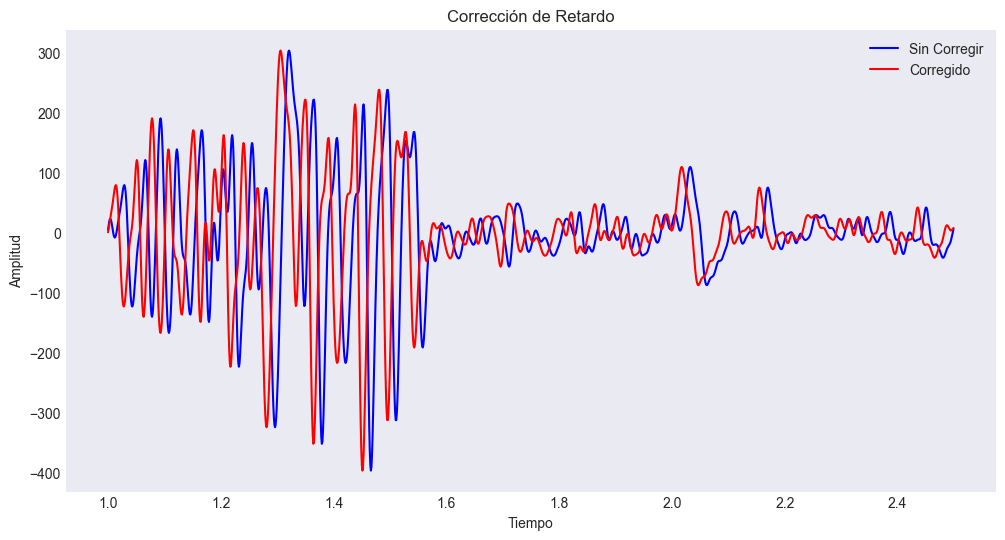

In [ ]:
# Calcular el retardo de grupo promedio para el filtro FIR de Hamming
emg_fir_corrected = np.roll(emg_hamming, -int(prom_retardo_ventana)) #Coorremos la señal de cuerdo al delay
plt.figure(figsize=(12, 6))
plt.plot(t[start:end], emg_hamming[start:end], label="Sin Corregir", color="blue")
plt.plot(t[start:end], emg_fir_corrected[start:end], label="Corregido", color="red")
plt.title("Corrección de Retardo")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()
